In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import numpy as np

N=275

aeInfo = np.transpose(np.loadtxt(open("fig3_fitnessIndividuals.csv", "rb"), delimiter=",")) 

inhibition_vector = range(0,280,5)
inhper_vector = np.asarray(inhibition_vector)/N*100


signals = sio.loadmat('fig3_pentropyStatistics.mat') #fig3_chaos
mean_bwout = signals['Hmean'].flatten()
std_bwout = signals['Hstd'].flatten()
mean_bwout = np.array(mean_bwout)
std_bwout = np.array(std_bwout)

/Users/miguel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


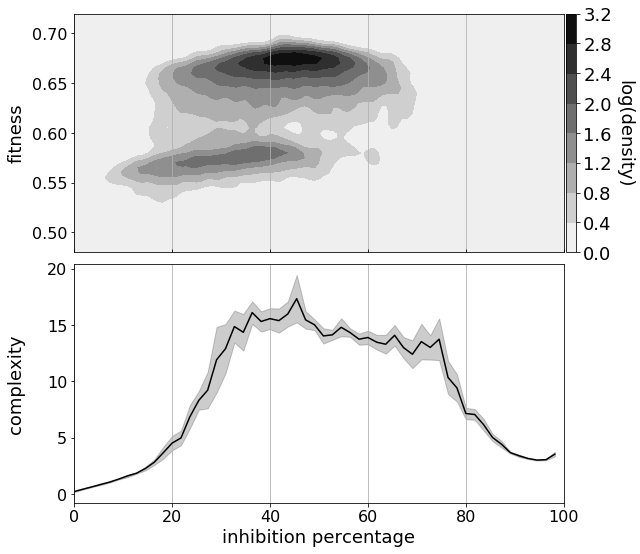

In [2]:
fSize = 18; lPad = 20; labelPos = -0.1; alpha = 0.5

width = 9
height = 9
fig3 = plt.figure(figsize=(width,height),constrained_layout=False)

gs = fig3.add_gridspec(2, 40)
plt.subplots_adjust(hspace=0.05)
alpha = 0.5

import scipy.ndimage

f3_ax1 = fig3.add_subplot(gs[0, :-1])
xedges = list(np.arange(0,102,1))
yedges = list(np.arange(0.4,0.7505,0.005))
h,xedges,yedges = np.histogram2d(aeInfo[1,:],aeInfo[2,:], bins=(xedges,yedges))
X, Y = np.meshgrid(xedges, yedges)
H = np.log10(h.T)
H[H== -np.inf] = 0
sigma = [1,1]
X = X[:-1,:-1]
Y = Y[:-1,:-1]
H = scipy.ndimage.filters.gaussian_filter(H, sigma, mode='constant')
im = f3_ax1.contourf(X, Y, H,cmap=plt.get_cmap('gist_yarg'))
#im = f3_ax1.pcolormesh(X, Y, H,cmap=plt.get_cmap('gist_yarg'))
#im.set_clim(0,np.max(H))
f3_axcb = fig3.add_subplot(gs[0, -1])
cbar = plt.colorbar(im,f3_axcb);
cbar.ax.tick_params(labelsize=fSize)
cbar.ax.set_ylabel('log(density)',fontsize=fSize,rotation=270,labelpad=21)
f3_ax1.set_ylabel('fitness',Fontsize=fSize)
f3_ax1.tick_params(axis='x', direction='in', bottom=True, top=False, labelbottom=False) 
f3_ax1.tick_params(axis='y',  labelsize = fSize-2)
#f3_ax1.set_title('Density of networks',Fontsize=fSize+2)
f3_ax1.set_xlim(0,100)
f3_ax1.set_ylim(0.48,0.72)
f3_ax1.get_yaxis().set_label_coords(labelPos,0.5)
f3_ax1.xaxis.grid(True)
#f3_ax1.set_title('networks',Fontsize=fSize+2)

serr_bwout = std_bwout/np.sqrt(10)
f3_ax2 = fig3.add_subplot(gs[1, :-1])
#f3_ax2.plot(inhper_vector[:-1],np.divide(mean_bwout[:-1],std_bwout)[:-1],color='k')
f3_ax2.plot(inhper_vector[:-1],mean_bwout[:-1],color='k')
f3_ax2.fill_between(inhper_vector[:-1],
                    mean_bwout[:-1]-1.96*serr_bwout[:-1],
                    mean_bwout[:-1]+1.96*serr_bwout[:-1],
                    color=[0,0,0,0.2])

f3_ax2.set_xlabel('inhibition percentage',Fontsize=fSize)
f3_ax2.set_ylabel('complexity',Fontsize=fSize)
f3_ax2.tick_params(axis='x',  labelsize = fSize-2)
f3_ax2.tick_params(axis='y',  labelsize = fSize-2)
f3_ax2.set_xlim(0,100)
f3_ax2.get_yaxis().set_label_coords(labelPos,0.5)
f3_ax2.xaxis.grid(True)

fig3.savefig("fig3.pdf",bbox_inches='tight')